In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import model_predict
import sys, itertools

In [2]:
series = model_predict.read_data_series(scale=False)

In [3]:
'''def test_stationarity(timeseries):
	dftest = adfuller(timeseries, autolag='AIC')
	print(f'ADF Statistic: {dftest[0]}')
	print(f'p-value: {dftest[1]}')
	plt.plot(timeseries)
	plt.show()
test_stationarity(np.diff(data, 2))
plot_acf(data, lags=30)
plot_pacf(data, lags=30)'''

"def test_stationarity(timeseries):\n\tdftest = adfuller(timeseries, autolag='AIC')\n\tprint(f'ADF Statistic: {dftest[0]}')\n\tprint(f'p-value: {dftest[1]}')\n\tplt.plot(timeseries)\n\tplt.show()\ntest_stationarity(np.diff(data, 2))\nplot_acf(data, lags=30)\nplot_pacf(data, lags=30)"

In [3]:
d = range(0, 2)
p = q = range(1, 12)
pdq = list(itertools.product(p, d, q))

sd = range(0, 2)
sp = sq = range(1, 3)
seasonal_pdq = list(itertools.product(sp, sd, sq, [12]))

combined_param = list(itertools.product(pdq, seasonal_pdq))

In [5]:
d = range(0, 2)
p = q = range(1, 12)
pdq = list(itertools.product(p, d, q))

sd = range(0, 2)
sp = sq = range(1, 3)
seasonal_pdq = list(itertools.product(sp, sd, sq, [12]))

combined_param = list(itertools.product(pdq, seasonal_pdq))

results = model_predict.find_best_param(series, combined_param, 16)

results.sort(key=lambda x: x[1])
print('Best AIC:', results[0])

Progress:   4%|▍         | 86/1936 [00:35<12:40,  2.43it/s] 

In [7]:
# 拟合 SARIMA 模型
# order = param_best  # AR 阶数为 1，差分阶数为 0，MA 阶数为 1
order = (1, 1, 2)
print(order)
seasonal_order = (1, 0, 1, 12)  # 季节性部分：季节 AR 阶数为 1，差分阶数为 0，季节 MA 阶数为 1，季节周期为 12 (假设数据是按月季节性的)
model = SARIMAX(series, order=order, seasonal_order=seasonal_order)  # 创建 SARIMA 模型对象
results = model.fit()  # 拟合模型，估计模型参数

# 输出模型拟合结果
print(results.summary())

(1, 0, 1)
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   81
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -391.095
Date:                            Sun, 28 Jul 2024   AIC                            792.189
Time:                                    21:18:42   BIC                            804.162
Sample:                                01-31-2014   HQIC                           796.993
                                     - 09-30-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9938      0.004    222.354      0.000       0.985       1.003
ma.L1         -0.8589    

C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\h1318\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


MSE: 647.38
MAE: 20.34
R^2: 0.23
MAPE: 0.45


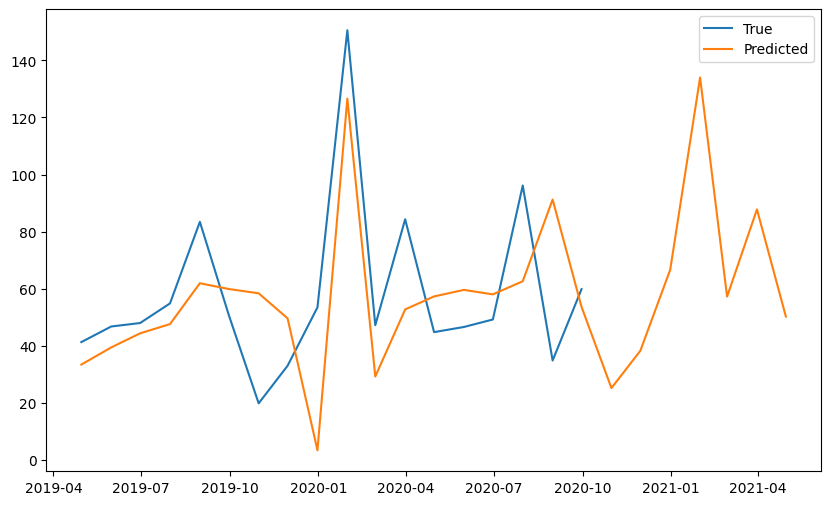

2019-04-30     33.365329
2019-05-31     39.385092
2019-06-30     44.336219
2019-07-31     47.564158
2019-08-31     61.887416
2019-09-30     59.867007
2019-10-31     58.359438
2019-11-30     49.592736
2019-12-31      3.329392
2020-01-31    126.618277
2020-02-29     29.190629
2020-03-31     52.703085
2020-04-30     57.272083
2020-05-31     59.560457
2020-06-30     57.983136
2020-07-31     62.594085
2020-08-31     91.233674
2020-09-30     53.602076
2020-10-31     25.137687
2020-11-30     38.218197
2020-12-31     66.628241
2021-01-31    134.022073
2021-02-28     57.198414
2021-03-31     87.778363
2021-04-30     50.209751
Freq: M, Name: predicted_mean, dtype: float64

In [17]:
import model_predict
import importlib
importlib.reload(model_predict)
model_predict.predict_to_future_arima(results, series, last_months=18)